#Q2
##i)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

In [2]:
data=pd.read_csv('cm_dataset_2.csv',header=None)
data.head(10)

,0,1
0,-1.206100,-2.52680
1,-3.703800,0.33831
2,4.344400,0.96302
3,3.361400,2.94250
4,4.117500,2.15120
5,-3.480000,-2.79970
6,0.041404,0.39711
7,3.009900,3.73340
8,-0.658110,-0.12628
9,0.776630,-0.36366


<Axes: xlabel='0', ylabel='1'>

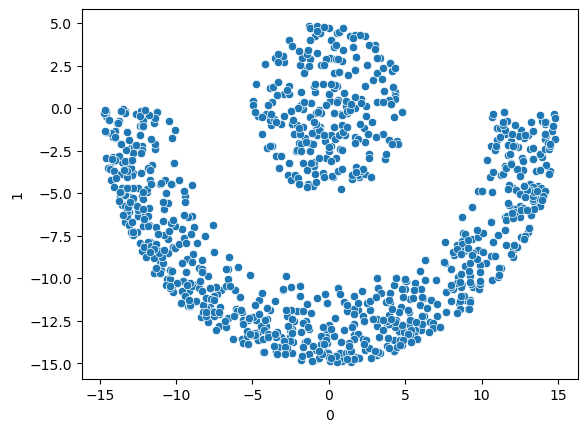

In [3]:
sns.scatterplot(data=data,x=0,y=1)

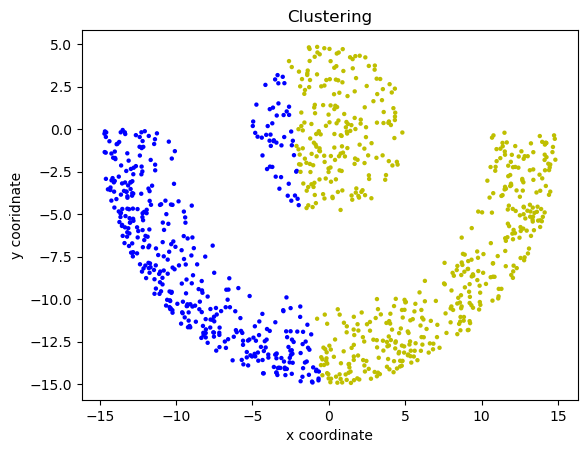

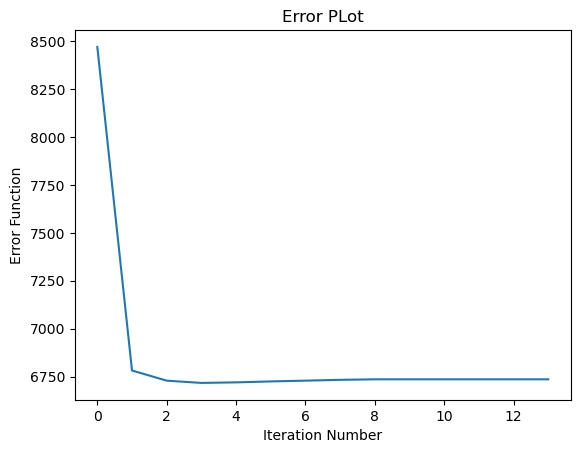

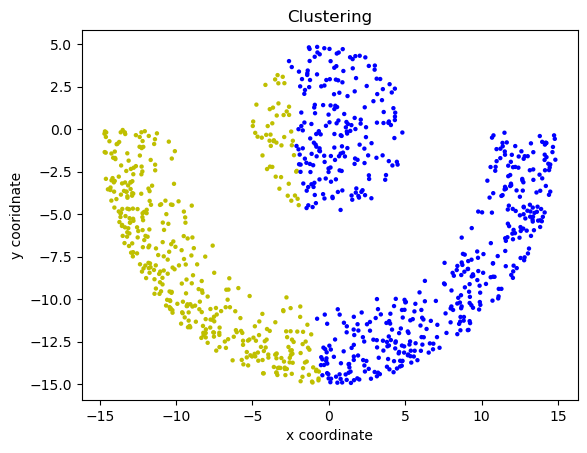

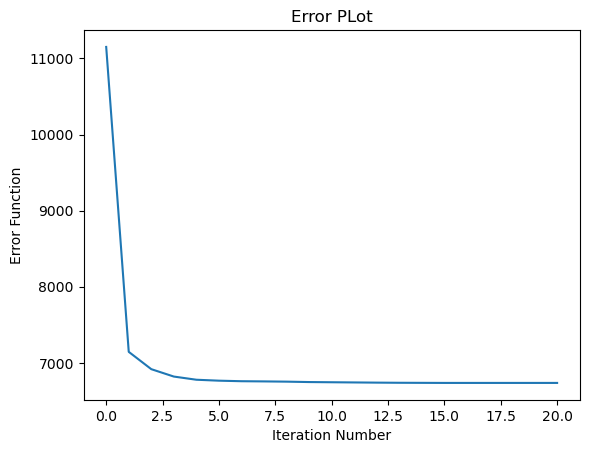

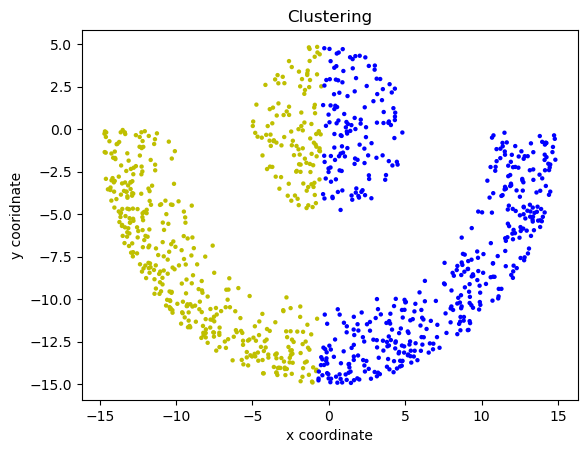

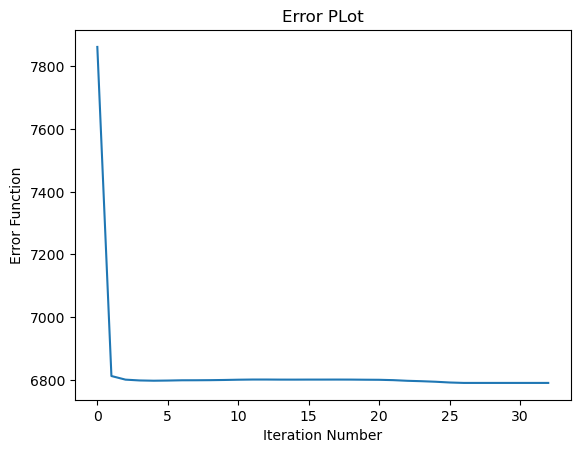

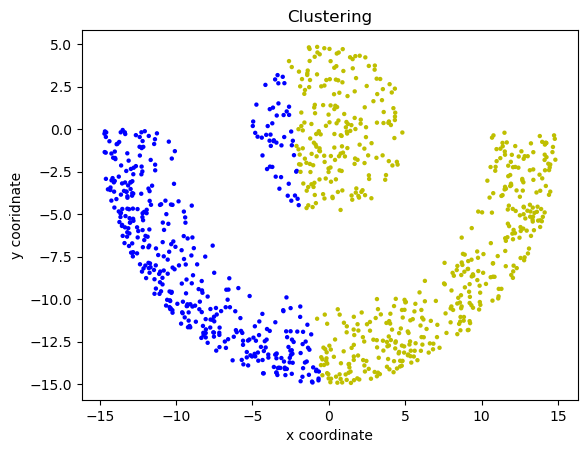

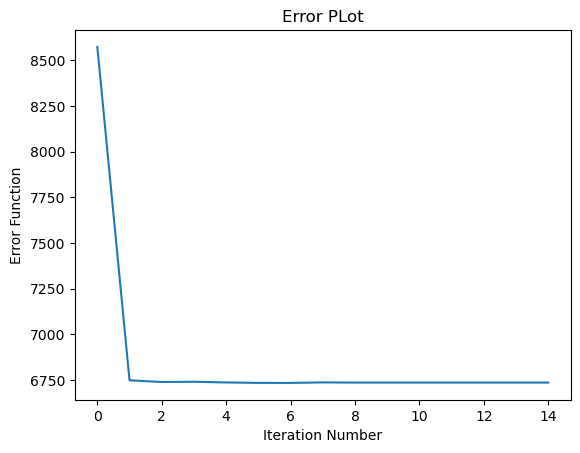

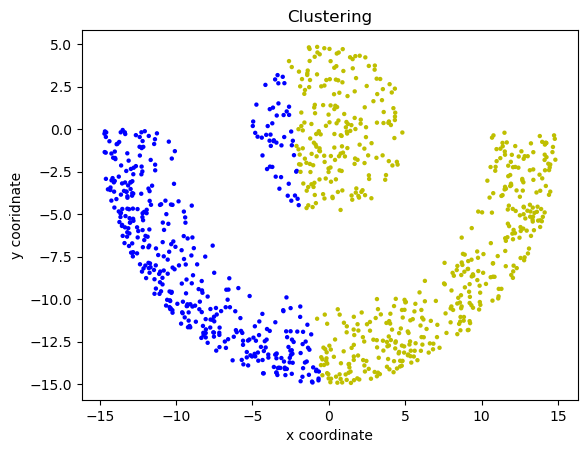

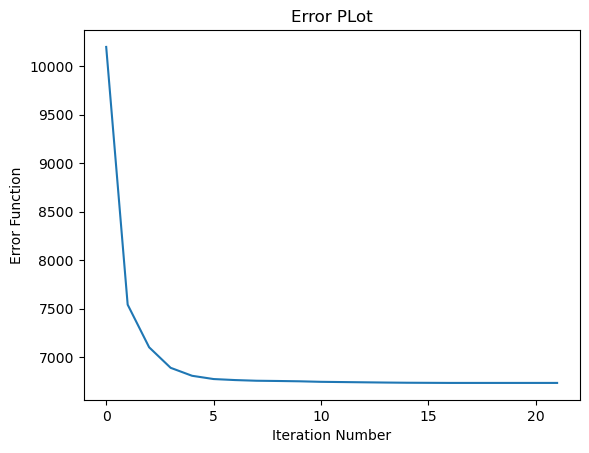

In [4]:
data=pd.read_csv('cm_dataset_2.csv',header=None).to_numpy()
X = data.T
k=2
for j in range(0,5):
    Z = np.zeros(1000)
    mean = np.zeros((2,k))
    Indicator = np.zeros((1000,k))
    objective = np.zeros((k,1000))
    error = np.zeros(5000)
    flag = 0

    #Initialize 4 random means and then the data points to the nearest of these random means
    for i in range(0,k):
        p = random.randint(0,999)
        mean[:,i] = X[:,p]
        Indicator[p][i] = 1

    for l in range(0,k):
        for i in range(0,1000):
            objective[l][i] = math.dist(X[:,i],mean[:,l])

    for i in range(0,1000):
        Z[i] = np.argmin(objective[:,i])
        Indicator[i][int(Z[i])] = 1

    #Kmeans algo
    t = 0
    while 1:
        if(t==0):
            for i in range(0,1000):
                error[0] = error[0]+math.dist(X[:,i],mean[:,int(Z[i])])

        for l in range(0,k):
            for i in range(0,1000):
                mean[:,l] = mean[:,l]+X[:,i]*Indicator[i][l]
            mean[:,l] = mean[:,l]/np.sum(Indicator[:,l])

        for l in range(0,k):
            for i in range(0,1000):
                objective[l][i] = math.dist(X[:,i],mean[:,l])

        for i in range(0,1000):
            if(Z[i]!=np.argmin(objective[:,i])):
                p = int(Z[i])
                mean[:,p] = (mean[:,p]*np.sum(Indicator[:,p])-X[:,i])/(np.sum(Indicator[:,p])-1)

                Indicator[i][int(Z[i])] = 0
                p = np.argmin(objective[:,i])
                mean[:,p] = (mean[:,p]*np.sum(Indicator[:,p])+X[:,i])/(np.sum(Indicator[:,p])+1)

                Z[i] = np.argmin(objective[:,i])
                Indicator[i][int(Z[i])] = 1


        #Error Function
        for i in range(0,1000):
            error[t+1] = error[t+1]+math.dist(X[:,i],mean[:,int(Z[i])])

        #Checking When to stop Kmeans
        if((t!=0)and(error[t]==error[t-1])):
            flag = 1
        if(flag == 1):
            stop_iterno = t
            break

        #Iter No
        t = t+1

    #Splitting clusters
    plt.title("Clustering")
    plt.xlabel("x coordinate")
    plt.ylabel("y cooridnate")

    col = []
    col = np.where(Z==0,'y',np.where(Z==1,'b',np.where(Z==2,'r','g')))
    plt.scatter(X[0,:], X[1,:], c=col, s=10, linewidth=0)
    plt.show()

    #PLotting Error Function
    plt.title("Error PLot")
    plt.xlabel("Iteration Number")
    plt.ylabel("Error Function")
    plt.plot(range(0,stop_iterno+1),error[0:stop_iterno+1])
    plt.show()

## ii)

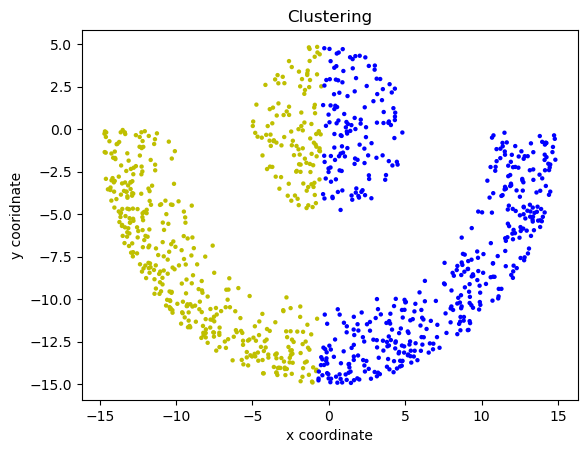

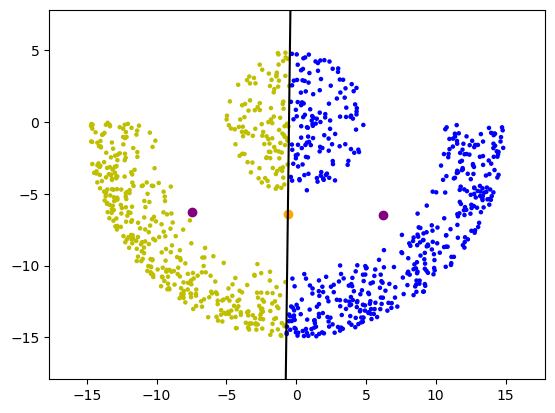

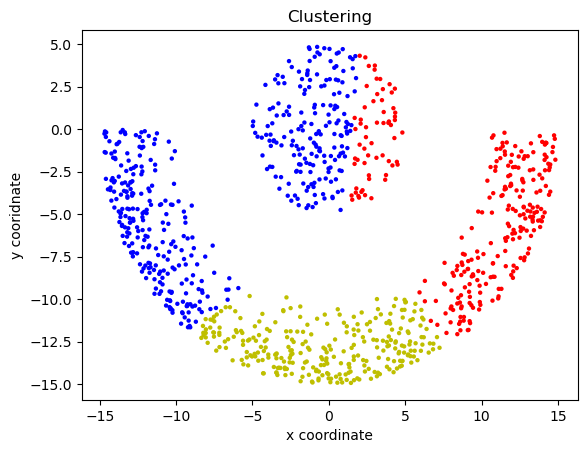

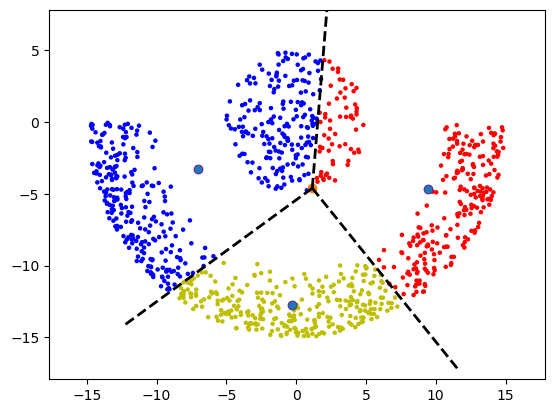

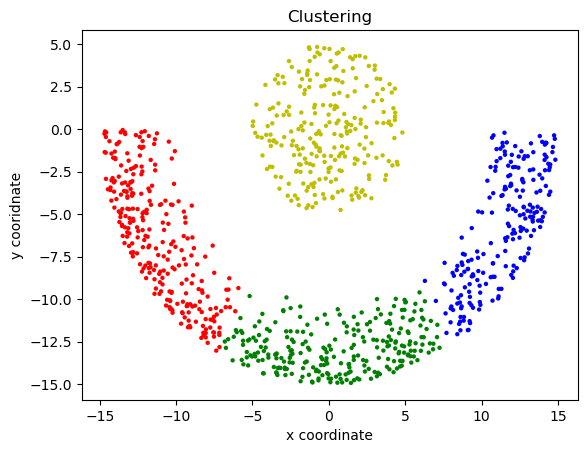

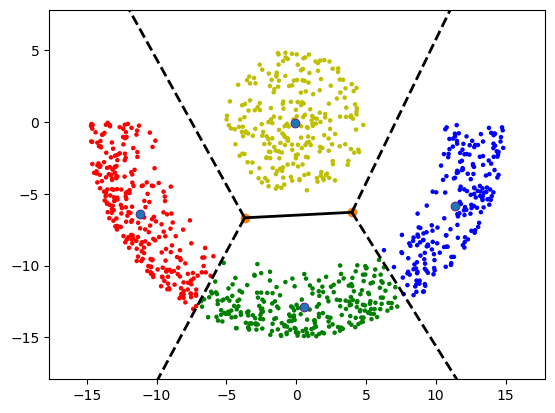

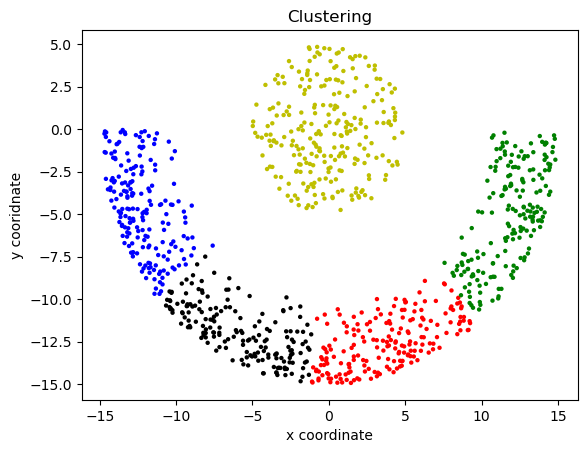

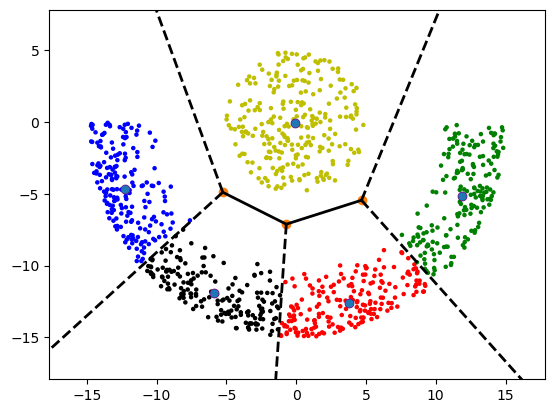

In [5]:
import random
import math
from scipy.spatial import Voronoi, voronoi_plot_2d
for l in range(2,6):
    Z = np.zeros(1000)
    mean = np.zeros((2,l))
    Indicator = np.zeros((1000,l))
    objective = np.zeros((l,1000))
    error = np.zeros(5000)
    flag = 0
    for i in range(0,l):
        p = random.randint(0,999)
        mean[:,i] = X[:,p]
        Indicator[p][i] = 1

    for k in range(0,l):
        for i in range(0,1000):
            objective[k][i] = math.dist(X[:,i],mean[:,k])

    for i in range(0,1000):
        Z[i] = np.argmin(objective[:,i])
        Indicator[i][int(Z[i])] = 1

    #Kmeans algo
    t = 0
    while 1:
        for k in range(0,l):
            for i in range(0,1000):
                mean[:,k] = mean[:,k]+X[:,i]*Indicator[i][k]
            mean[:,k] = mean[:,k]/np.sum(Indicator[:,k])

        for k in range(0,l):
            for i in range(0,1000):
                objective[k][i] = math.dist(X[:,i],mean[:,k])

        for i in range(0,1000):
            p = int(Z[i])
            mean[:,p] = (mean[:,p]*np.sum(Indicator[:,p])-X[:,i])/(np.sum(Indicator[:,p])-1)

            Indicator[i][int(Z[i])] = 0
            p = np.argmin(objective[:,i])
            mean[:,p] = (mean[:,p]*np.sum(Indicator[:,p])+X[:,i])/(np.sum(Indicator[:,p])+1)

            Z[i] = np.argmin(objective[:,i])
            Indicator[i][int(Z[i])] = 1

        #Error Function
        for i in range(0,1000):
            error[t] = error[t]+math.dist(X[:,i],mean[:,int(Z[i])])

        #Checking When to stop Kmeans
        if((t!=0)and(error[t]==error[t-1])):
            flag = 1
        if(flag == 1):
            stop_iterno = t
            break

        #Iter No
        t = t+1

    #Splitting clusters
    plt.title("Clustering")
    plt.xlabel("x coordinate")
    plt.ylabel("y cooridnate")

    col = []
    col = np.where(Z==0,'y',np.where(Z==1,'b',np.where(Z==2,'r',np.where(Z==3,'g','k'))))
    plt.scatter(X[0,:], X[1,:], c=col, s=10, linewidth=0)
    plt.show()

    #Plotting Voronoi Regions
    midmean = np.zeros((2))
    p = np.zeros((2,2))
    if(l==2):
        m = (mean[1,1]-mean[1,0])/(mean[0,1]-mean[0,0])
        m = -1/m
        midmean[0] = (mean[0][0]+mean[0][1])/2
        midmean[1] = (mean[1][0]+mean[1][1])/2
        inter = midmean[1]-m*midmean[0]
        p[:,0] = (min(X[0, :]),m*min(X[0, :])+inter)
        p[:,1] = (max(X[1, :]),m*max(X[1, :])+inter)
        plt.plot(p[0,:],p[1,:],c='k')

        plt.scatter(midmean[0],midmean[1],c = 'orange')
        plt.scatter(mean[0,:],mean[1,:],c='purple')
        plt.scatter(X[0, :], X[1, :], c=col, s=5)
        plt.xlim(min(X[0,:]-3), max(X[0,:])+3)
        plt.ylim(min(X[1,:]-3), max(X[1,:])+3)
        plt.show()

    if(l>2):
        mean_Vor = mean.T.tolist()
        vor = Voronoi(mean_Vor)
        voronoi_plot_2d(vor, line_width=2, line_alpha=1, point_size=10)

        plt.scatter(X[0, :], X[1, :], c=col, s=5)
        plt.scatter(mean[0,:],mean[1,:],c='purple')
        plt.xlim(min(X[0,:]-3), max(X[0,:])+3)
        plt.ylim(min(X[1,:]-3), max(X[1,:])+3)
        plt.show()


## iii)

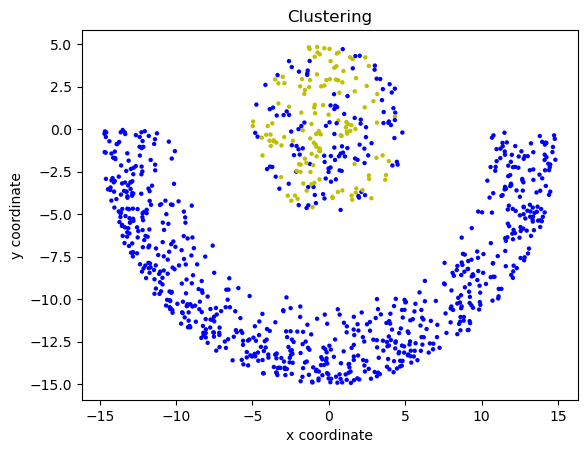

In [14]:
#Defining Kernel

shape = data.shape
K = np.zeros((shape[0],shape[0]))
X = data.T
for i in range(0,shape[0]):
    for j in range(0,shape[0]):
        K[i][j] = np.exp(-(np.matmul((X[:,i]-X[:,j]).T,(X[:,i]-X[:,j])))/1)

#Finding H matrix
from numpy.linalg import eigh
eigen_kernel,h = eigh(K)

order = eigen_kernel.argsort()[::-1] #Argsort returns the order in which eigen values will be arranged if sorted
eigen_kernel = eigen_kernel[order]
h = h[:,order]
h = h[:,0:2]

#Normalizing H matrix
for i in range(0,1000):
    h[i,:] = h[i,:]/(np.linalg.norm(h[i,:]))

X = h.T
Z = np.zeros(1000)
mean = np.zeros((2,2))
Indicator = np.zeros((1000,2))
objective = np.zeros((2,1000))
error = np.zeros(5000)
flag = 0

#Initialize 2 random means and then the data points to the nearest of these random means
for i in range(0,2):
    p = random.randint(0,999)
    mean[:,i] = X[:,p]
    Indicator[p][i] = 1

for k in range(0,2):
    for i in range(0,1000):
        objective[k][i] = math.dist(X[:,i],mean[:,k])

for i in range(0,1000):
    Z[i] = np.argmin(objective[:,i])
    Indicator[i][int(Z[i])] = 1

#Kmeans algo
t = 0
while 1:
    for k in range(0,2):
        for i in range(0,1000):
            mean[:,k] = mean[:,k]+X[:,i]*Indicator[i][k]
        mean[:,k] = mean[:,k]/np.sum(Indicator[:,k])

    for k in range(0,2):
        for i in range(0,1000):
            objective[k][i] = math.dist(X[:,i],mean[:,k])

    for i in range(0,1000):
        p = int(Z[i])
        mean[:,p] = (mean[:,p]*np.sum(Indicator[:,p])-X[:,i])/(np.sum(Indicator[:,p])-1)

        Indicator[i][int(Z[i])] = 0
        p = np.argmin(objective[:,i])
        mean[:,p] = (mean[:,p]*np.sum(Indicator[:,p])+X[:,i])/(np.sum(Indicator[:,p])+1)

        Z[i] = np.argmin(objective[:,i])
        Indicator[i][int(Z[i])] = 1


    #Error Function
    for i in range(0,1000):
        error[t] = error[t]+math.dist(X[:,i],mean[:,int(Z[i])])

    #Checking When to stop Kmeans
    if((t!=0)and(error[t]==error[t-1])):
        flag = 1
    if(flag == 1):
        stop_iterno = t
        break

    #Iter No
    t = t+1

#Splitting clusters
plt.title("Clustering")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")

col = []
col = np.where(Z==0,'y',np.where(Z==1,'b',np.where(Z==2,'r','g')))
plt.scatter(data.T[0,:], data.T[1,:], c=col, s=10, linewidth=0)
plt.show()